# APE ANALYTICS
## Data analysis with python from scratch, lesson 9: 10 traits of great analysts and F1 cars (wrap up)

### 0. Data sources

#### 0.1. Kaggle

The Formula 1 data from Kaggle: https://www.kaggle.com/cjgdev/formula-1-race-data-19502017 (accessed 20/04/2020)

### 1. Classic libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import re

### 2. Loading the data

#### 2.1. Accessing the files on my local drive

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '100_Numpy_exercises.ipynb',
 '2020-04-11_FR_Mobility_Report_en.pdf',
 'analytics_w_python_from_scratch_lesson_1.ipynb',
 'analytics_w_python_from_scratch_lesson_1_prep.ipynb',
 'analytics_w_python_from_scratch_lesson_2.ipynb',
 'analytics_w_python_from_scratch_lesson_2_prep.ipynb',
 'analytics_w_python_from_scratch_lesson_3.ipynb',
 'analytics_w_python_from_scratch_lesson_3_prep.ipynb',
 'analytics_w_python_from_scratch_lesson_4.ipynb',
 'analytics_w_python_from_scratch_lesson_4_prep.ipynb',
 'analytics_w_python_from_scratch_lesson_5.ipynb',
 'analytics_w_python_from_scratch_lesson_5_prep.ipynb',
 'analytics_w_python_from_scratch_lesson_6.ipynb',
 'analytics_w_python_from_scratch_lesson_6_prep.ipynb',
 'analytics_w_python_from_scratch_lesson_7.ipynb',
 'analytics_w_python_from_scratch_lesson_7_prep.ipynb',
 'analytics_w_python_from_scratch_lesson_8.ipynb',
 'analytics_w_python_from_scratch_lesson_8_prep.ipynb',
 'analytics_w_python_from_scratch_lesson_9.ipynb',

In [3]:
files = [x for x in os.listdir() if x.startswith('f1')]
files

['f1_circuits.csv',
 'f1_constructorResults.csv',
 'f1_constructors.csv',
 'f1_constructorStandings.csv',
 'f1_drivers.csv',
 'f1_driverStandings.csv',
 'f1_lapTimes.csv',
 'f1_pitStops.csv',
 'f1_qualifying.csv',
 'f1_races.csv',
 'f1_results.csv',
 'f1_seasons.csv',
 'f1_status.csv']

In [4]:
names = [re.findall('(?<=f1_)\w*', x)[0] for x in files]
names

['circuits',
 'constructorResults',
 'constructors',
 'constructorStandings',
 'drivers',
 'driverStandings',
 'lapTimes',
 'pitStops',
 'qualifying',
 'races',
 'results',
 'seasons',
 'status']

#### 2.2. Reading the CSVs in a dictionary of dataframes

In [5]:
data_dict = {}

for i, file in enumerate(files):
    name = names[i]
    data_dict[name] = pd.read_csv(file)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcc in position 3: invalid continuation byte

In [6]:
data_dict = {}

for i, file in enumerate(files):
    name = names[i]
    data_dict[name] = pd.read_csv(file, encoding = 'latin-1') # https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte

### 3. Getting familiar with the data

Let's just print samples of each dataframe from our dictionary and take a look at some extracts

In [7]:
data_dict['circuits'].sample(3)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
58,59,boavista,Circuito da Boavista,Oporto,Portugal,41.1705,-8.67325,NaN,http://en.wikipedia.org/wiki/Circuito_da_Boavista
42,43,long_beach,Long Beach,California,USA,33.7651,-118.18900,NaN,"http://en.wikipedia.org/wiki/Long_Beach,_Calif..."


In [8]:
data_dict['constructorResults'].sample(3)

,constructorResultsId,raceId,constructorId,points,status
10734,15232,950,9,27.0,NaN
6709,13500,533,34,2.0,NaN
8682,9869,763,170,8.0,NaN


In [9]:
data_dict['constructors'].sample(3)

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
69,71,apollon,Apollon,Swiss,http://en.wikipedia.org/wiki/Apollon_(Formula_...,NaN
121,123,fry,Fry,British,http://en.wikipedia.org/wiki/Fry_(racing_team),NaN
77,79,token,Token,British,http://en.wikipedia.org/wiki/Token_(Racing_team),NaN


In [10]:
data_dict['constructorStandings'].sample(3)

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,Unnamed: 7
7433,23062,571,56,3.0,11,11,0,NaN
9691,20785,682,190,9.0,5,5,1,NaN
10801,25115,878,208,302.0,4,4,1,NaN


In [11]:
data_dict['drivers'].sample(3)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
229,230,brambilla,NaN,NaN,Vittorio,Brambilla,11/11/1937,Italian,http://en.wikipedia.org/wiki/Vittorio_Brambilla
67,68,takagi,NaN,NaN,Toranosuke,Takagi,12/02/1974,Japanese,http://en.wikipedia.org/wiki/Toranosuke_Takagi
654,654,faulkner,NaN,NaN,Walt,Faulkner,16/02/1920,American,http://en.wikipedia.org/wiki/Walt_Faulkner


In [12]:
data_dict['driverStandings'].sample(3)

,driverStandingsId,raceId,driverId,points,position,positionText,wins
25863,45218,815,628,0.0,86,86,0
17836,53206,634,341,0.0,13,13,0
9020,19254,380,141,0.0,22,22,0


In [13]:
data_dict['lapTimes'].sample(3)

,raceId,driverId,lap,position,time,milliseconds
403690,966,839,14,14,1:26.033,86033
259462,102,21,23,9,1:22.220,82220
191425,170,60,2,21,2:18.567,138567


In [14]:
data_dict['pitStops'].sample(3)

,raceId,driverId,stop,lap,time,duration,milliseconds
79,842,30,2,28,16:53:26,22.261,22261
3996,930,807,2,26,14:45:13,22.534,22534
2178,881,807,4,44,17:22:50,23.198,23198


In [15]:
data_dict['qualifying'].sample(3)

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
6065,6068,908,826,5,26,9,1:41.032,1:36.813,1:40.707
4042,4044,122,31,3,3,4,1:11.948,NaN,NaN
3420,3422,341,17,9,6,1,1:21.412,1:20.655,1:19.995


In [16]:
data_dict['races'].sample(3)

,raceId,year,round,circuitId,name,date,time,url
665,666,1969,11,32,Mexican Grand Prix,1969-10-19,NaN,http://en.wikipedia.org/wiki/1969_Mexican_Gran...
166,167,2000,10,23,Austrian Grand Prix,2000-07-16,NaN,http://en.wikipedia.org/wiki/2000_Austrian_Gra...
179,180,1999,6,7,Canadian Grand Prix,1999-06-13,NaN,http://en.wikipedia.org/wiki/1999_Canadian_Gra...


In [17]:
data_dict['races'][data_dict['races']['year'] == 2017]

,raceId,year,round,circuitId,name,date,time,url
956,969,2017,1,1,Australian Grand Prix,2017-03-26,05:00:00,https://en.wikipedia.org/wiki/2017_Australian_...
957,970,2017,2,17,Chinese Grand Prix,2017-04-09,06:00:00,https://en.wikipedia.org/wiki/2017_Chinese_Gra...
958,971,2017,3,3,Bahrain Grand Prix,2017-04-16,15:00:00,https://en.wikipedia.org/wiki/2017_Bahrain_Gra...
959,972,2017,4,71,Russian Grand Prix,2017-04-30,12:00:00,https://en.wikipedia.org/wiki/2017_Russian_Gra...
960,973,2017,5,4,Spanish Grand Prix,2017-05-14,12:00:00,https://en.wikipedia.org/wiki/2017_Spanish_Gra...
961,974,2017,6,6,Monaco Grand Prix,2017-05-28,12:00:00,https://en.wikipedia.org/wiki/2017_Monaco_Gran...
962,975,2017,7,7,Canadian Grand Prix,2017-06-11,18:00:00,https://en.wikipedia.org/wiki/2017_Canadian_Gr...
963,976,2017,8,73,Azerbaijan Grand Prix,2017-06-25,13:00:00,https://en.wikipedia.org/wiki/2017_Azerbaijan_...
964,977,2017,9,70,Austrian Grand Prix,2017-07-09,12:00:00,https://en.wikipedia.org/wiki/2017_Austrian_Gr...
965,978,2017,10,9,British Grand Prix,2017-07-16,12:00:00,https://en.wikipedia.org/wiki/2017_British_Gra...


In [18]:
data_dict['results'].sample(3)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
22454,22458,914,824,206,17.0,18,20.0,20,20,0.0,41,NaN,NaN,27.0,20.0,01:56.0,180.24,3
196,197,27,15,7,11.0,4,9.0,9,9,0.0,67,37.158,5518032.0,17.0,12.0,01:17.0,213.785,1
8441,8442,370,163,27,25.0,0,NaN,F,27,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,81


In [19]:
data_dict['seasons'].sample(3)

,year,url
46,1964,http://en.wikipedia.org/wiki/1964_Formula_One_...
19,1990,http://en.wikipedia.org/wiki/1990_Formula_One_...
49,1961,http://en.wikipedia.org/wiki/1961_Formula_One_...


In [20]:
data_dict['status'].sample(3)

,statusId,status
52,53,+13 Laps
127,130,Collision damage
125,126,Supercharger


In [21]:
data_dict['results'][data_dict['results']['raceId'] == 988].head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
23757,23762,988,822,131,77.0,1,1.0,1,1,25.0,55,34:14.1,5654062.0,52.0,1.0,01:40.7,198.652,1
23758,23763,988,1,131,44.0,2,2.0,2,2,18.0,55,3.899,5657961.0,51.0,3.0,01:41.5,197.041,1
23759,23764,988,20,6,5.0,3,3.0,3,3,15.0,55,19.33,5673392.0,5.0,2.0,01:40.8,198.416,1
23760,23765,988,8,6,7.0,5,4.0,4,4,12.0,55,45.386,5699448.0,53.0,7.0,01:42.3,195.376,1
23761,23766,988,830,9,33.0,6,5.0,5,5,10.0,55,46.269,5700331.0,43.0,5.0,01:42.0,195.969,1


In [22]:
data_dict['status'][data_dict['status']['statusId'].isin([1, 11, 36, 9])]

,statusId,status
0,1,Finished
8,9,Hydraulics
10,11,+1 Lap
35,36,Wheel


### 4. Cleaning and prepping

#### 4.1. Building a single data frame for our use case

Remove and rename columns

In [23]:
data_dict['results'].drop(columns = ['rank', 'positionOrder'], inplace = True)

data_dict['constructors'].drop(columns = ['nationality', 'url', 'Unnamed: 5'], inplace = True)
data_dict['constructors'].rename(columns = {'name': 'constructorName'}, inplace = True)

data_dict['races'].drop(columns = ['time', 'url'], inplace = True)
data_dict['races'].rename(columns = {'name': 'raceName', 'date': 'raceDate'}, inplace = True)

data_dict['circuits'].drop(columns = ['lat', 'lng', 'alt', 'url'], inplace = True)
data_dict['circuits'].rename(columns = {'name': 'circuitName'}, inplace = True)

data_dict['drivers'].drop(columns = ['number', 'code', 'url'], inplace = True)

Join the results data set with the other 5 above + the status dataframe

In [24]:
df = data_dict['results'].copy()
df = df.merge(data_dict['constructors'], how = 'left')
df = df.merge(data_dict['races'], how = 'left')
df = df.merge(data_dict['circuits'], how = 'left')
df = df.merge(data_dict['drivers'], how = 'left')
df = df.merge(data_dict['status'], how = 'left')

Same length pre and post join, good

In [25]:
len(df), len(data_dict['results'])

(23777, 23777)

What time frame are we covering BTW?

In [26]:
df['year'].min(), df['year'].max()

(1950, 2017)

#### 4. 2. Adding new columns and fixing issues

Adding new columns and converting some data types - starting with a lap distance column (speed = distance / time ==> distance = speed * time)

In [27]:
df['fastestLapTimeSec'] = (df['fastestLapTime'].str.split(':', expand = True)[0].astype('float64') * 60) + df['fastestLapTime'].str.split(':', expand = True)[1].astype('float64')
df['fastestLapTimeSec'].tail(5)

23772    103.8
23773    103.6
23774    102.3
23775    103.4
23776    102.8
Name: fastestLapTimeSec, dtype: float64

In [28]:
df['fastestLapSpeed'].head(5)

0      218.3
1    217.586
2    216.719
3    215.464
4    218.385
Name: fastestLapSpeed, dtype: object

In [29]:
df['fastestLapSpeed'].astype('float64')

ValueError: could not convert string to float: '01:42.6'

Let's see where this error is coming from

In [30]:
df[df['fastestLapSpeed'] == '01:42.6'][['country', 'year', 'driverRef', 'fastestLapSpeed', 'fastestLapTime']]

,country,year,driverRef,fastestLapSpeed,fastestLapTime
23764,UAE,2017,ocon,01:42.6,01:42.6


In [31]:
df[(df['year'] == 2017) & (df['country'] == 'UAE')][['driverRef', 'fastestLapTime', 'fastestLapTimeSec', 'fastestLapSpeed']]

,driverRef,fastestLapTime,fastestLapTimeSec,fastestLapSpeed
23757,bottas,01:40.7,100.7,198.652
23758,hamilton,01:41.5,101.5,197.041
23759,vettel,01:40.8,100.8,198.416
23760,raikkonen,01:42.3,102.3,195.376
23761,max_verstappen,01:42.0,102.0,195.969
23762,hulkenberg,01:42.4,102.4,195.303
23763,perez,01:42.7,102.7,194.708
23764,ocon,01:42.6,102.6,01:42.6
23765,alonso,01:43.4,103.4,193.41
23766,massa,01:43.0,103.0,194.071


Let's correct the wrong speed value for Ocon using the Ricciardo observation

In [32]:
t = df.loc[23766, ['fastestLapTimeSec']] 
s = df.loc[23766, ['fastestLapSpeed']].astype('float64')
r = s[0] / t[0]
r

1.8841844660194174

In [33]:
newSpeed = r * df.loc[23764, ['fastestLapTimeSec']][0]
df.loc[23764, ['fastestLapSpeed']] = str(newSpeed)
df[(df['year'] == 2017) & (df['country'] == 'UAE')][['driverRef', 'fastestLapTime', 'fastestLapTimeSec', 'fastestLapSpeed']]

,driverRef,fastestLapTime,fastestLapTimeSec,fastestLapSpeed
23757,bottas,01:40.7,100.7,198.652
23758,hamilton,01:41.5,101.5,197.041
23759,vettel,01:40.8,100.8,198.416
23760,raikkonen,01:42.3,102.3,195.376
23761,max_verstappen,01:42.0,102.0,195.969
23762,hulkenberg,01:42.4,102.4,195.303
23763,perez,01:42.7,102.7,194.708
23764,ocon,01:42.6,102.6,193.31732621359222
23765,alonso,01:43.4,103.4,193.41
23766,massa,01:43.0,103.0,194.071


We can now build our new speed column in meters per second

In [34]:
df['fastestLapSpeed'] = df['fastestLapSpeed'].astype('float64')
df['fastestLapSpeedMetersPerSec'] = 1000 * df['fastestLapSpeed'] / 3600

We can now calculte the approx length in meter of the track using the fastest lap

In [35]:
df['fastestLapLength'] = df['fastestLapTimeSec'] * df['fastestLapSpeedMetersPerSec']
df['fastestLapLength']

0        5305.902778
1        5300.636722
2        5303.595528
3        5302.808444
4        5301.902500
            ...     
23772    5551.627667
23773    5555.751444
23774    5552.673500
23775    5555.165000
23776    5556.311444
Name: fastestLapLength, Length: 23777, dtype: float64

### 5. Sense checking

#### 5.1. Our circuit length calculation

https://www.google.com/search?q=monza+circuit+length&rlz=1C1GCEA_enGB804GB804&oq=monza+circuit+length&aqs=chrome..69i57.5270j1j4&sourceid=chrome&ie=UTF-8

In [36]:
df[(df['year'] == 2017) & (df['country'] == 'Italy')][['driverRef', 'circuitName', 'fastestLapLength']]

,driverRef,circuitName,fastestLapLength
23617,hamilton,Autodromo Nazionale di Monza,5793.809861
23618,bottas,Autodromo Nazionale di Monza,5777.620139
23619,vettel,Autodromo Nazionale di Monza,5793.201778
23620,ricciardo,Autodromo Nazionale di Monza,5795.697667
23621,raikkonen,Autodromo Nazionale di Monza,5796.113722
23622,ocon,Autodromo Nazionale di Monza,5755.643944
23623,stroll,Autodromo Nazionale di Monza,5791.291778
23624,massa,Autodromo Nazionale di Monza,5794.548750
23625,perez,Autodromo Nazionale di Monza,5795.158333
23626,max_verstappen,Autodromo Nazionale di Monza,5796.357556


#### 5.2. The number of points of each driver got at the end of the 2017 championship

https://en.wikipedia.org/wiki/2017_Formula_One_World_Championship

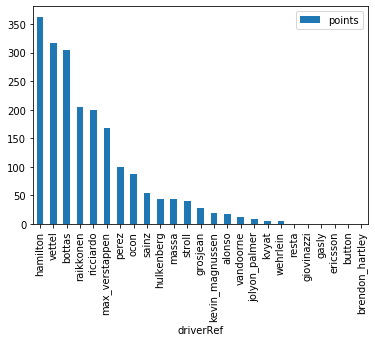

In [37]:
df[df['year'] == 2017].groupby(['driverRef']).agg({'points': 'sum'}).sort_values(by = 'points', ascending = False).plot.bar()

#### 5.3. Ricciardo's fastest lap time at Monza in 2017

https://gpracingstats.com/circuits/monza/

In [38]:
df[(df['year'] == 2017) & (df['surname'] == 'Ricciardo') & (df['country'] == 'Italy')][['fastestLapTime', 'fastestLapSpeed']]

,fastestLapTime,fastestLapSpeed
23620,01:23.4,250.174


### 6. So... Are F1 cars faster?

Let's create a data frame for that question

In [39]:
df_speed = df.copy()

Let's also record the length of that df

In [40]:
orig_df_speed_len = len(df_speed)

77% of our observations are missing the speed info

In [41]:
len(df_speed[df_speed['fastestLapSpeed'].isna()]) / len(df_speed)

0.7736047440804138

#### 6.1. Dealing with missing speed values pre 2004

Looks like we have a lot less missing speeds from 2004 onwards

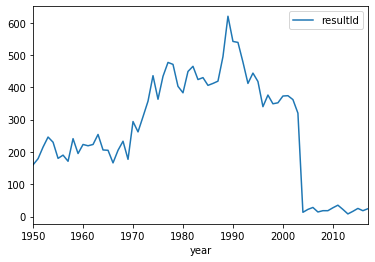

In [42]:
df_speed[df_speed['fastestLapSpeed'].isna()].groupby(['year']).agg({'resultId': 'count'}).plot()

In [43]:
df_speed[df_speed['fastestLapSpeed'].isna()].groupby(['year']).agg({'resultId': 'count'}).loc[2000:]

,resultId
year,
2000,373
2001,374
2002,362
2003,320
2004,13
2005,22
2006,28
2007,14
2008,18


So let's remove all the data before that season from our speed data frame

In [44]:
df_speed = df_speed[df_speed['year'] >= 2004]

A few speed nulls remain

In [45]:
df_speed.isna().sum()

resultId                          0
raceId                            0
driverId                          0
constructorId                     0
number                            0
grid                              0
position                       1191
positionText                      0
points                            0
laps                              0
time                           3049
milliseconds                   3049
fastestLap                      288
fastestLapTime                  288
fastestLapSpeed                 288
statusId                          0
constructorRef                    0
constructorName                   0
year                              0
round                             0
circuitId                         0
raceName                          0
raceDate                          0
circuitRef                        0
circuitName                       0
location                          0
country                           0
driverRef                   

In [46]:
df_speed['fastestLapSpeed'].isna().sum() / len(df_speed)

0.05078469405748545

#### 6.2. Dealing with missing speed values for the Shanghai GP 2011

Let's look into the 5% of 2004 - 2017 data that has no fastestLapSpeed

In [47]:
df_speed[df_speed['fastestLapSpeed'].isna()].groupby(['year', 'country'], as_index = False).agg({'resultId': 'count'}).sort_values(by = 'resultId', ascending = False)

,year,country,resultId
66,2011,China,24
12,2005,USA,14
24,2006,USA,7
58,2010,Japan,5
34,2008,Australia,5
...,...,...,...
85,2013,Malaysia,1
35,2008,Bahrain,1
83,2013,Italy,1
82,2013,India,1


Looks like no speed data is available for any driver in the 2011 Shanghai GP

In [48]:
df_speed[(df_speed['country'] == 'China') & (df_speed['year'] == 2011)]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,points,laps,...,country,driverRef,forename,surname,dob,nationality,status,fastestLapTimeSec,fastestLapSpeedMetersPerSec,fastestLapLength
20822,20825,843,1,1,3.0,3,1.0,1,25.0,56,...,China,hamilton,Lewis,Hamilton,07/01/1985,British,Finished,NaN,NaN,NaN
20823,20826,843,20,9,1.0,1,2.0,2,18.0,56,...,China,vettel,Sebastian,Vettel,03/07/1987,German,Finished,NaN,NaN,NaN
20824,20827,843,17,9,2.0,18,3.0,3,15.0,56,...,China,webber,Mark,Webber,27/08/1976,Australian,Finished,NaN,NaN,NaN
20825,20828,843,18,1,4.0,2,4.0,4,12.0,56,...,China,button,Jenson,Button,19/01/1980,British,Finished,NaN,NaN,NaN
20826,20829,843,3,131,8.0,4,5.0,5,10.0,56,...,China,rosberg,Nico,Rosberg,27/06/1985,German,Finished,NaN,NaN,NaN
20827,20830,843,13,6,6.0,6,6.0,6,8.0,56,...,China,massa,Felipe,Massa,25/04/1981,Brazilian,Finished,NaN,NaN,NaN
20828,20831,843,4,6,5.0,5,7.0,7,6.0,56,...,China,alonso,Fernando,Alonso,29/07/1981,Spanish,Finished,NaN,NaN,NaN
20829,20832,843,30,131,7.0,14,8.0,8,4.0,56,...,China,michael_schumacher,Michael,Schumacher,03/01/1969,German,Finished,NaN,NaN,NaN
20830,20833,843,808,4,10.0,10,9.0,9,2.0,56,...,China,petrov,Vitaly,Petrov,08/09/1984,Russian,Finished,NaN,NaN,NaN
20831,20834,843,155,15,16.0,13,10.0,10,1.0,56,...,China,kobayashi,Kamui,Kobayashi,13/09/1986,Japanese,Finished,NaN,NaN,NaN


Let's drop this GP

In [49]:
df_speed = df_speed[df_speed['raceId'] != 843]

#### 6.3. Dealing Kvyat's missing speed values for the Russian GP 2015

Only one guy finished despite having no fastest lap speed, who dat?

In [50]:
df_speed[df_speed['fastestLapSpeed'].isna()]['status'].value_counts()

Collision           113
Accident             60
Withdrew             23
Collision damage     11
Engine                9
Gearbox               6
Power Unit            4
Did not qualify       4
Retired               4
Hydraulics            3
Puncture              2
Power loss            2
Transmission          2
Suspension            2
Spun off              2
Driveshaft            2
Fuel system           2
Fuel pressure         1
Electrical            1
Oil leak              1
Injury                1
Disqualified          1
Injured               1
Finished              1
ERS                   1
Mechanical            1
Front wing            1
Electronics           1
Overheating           1
Battery               1
Name: status, dtype: int64

That's Daniil Kvyat

In [51]:
df_speed[(df_speed['fastestLapSpeed'].isna()) & (df_speed['status'] == 'Finished')]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,points,laps,...,country,driverRef,forename,surname,dob,nationality,status,fastestLapTimeSec,fastestLapSpeedMetersPerSec,fastestLapLength
22832,22836,941,826,9,26.0,11,5.0,5,10.0,53,...,Russia,kvyat,Daniil,Kvyat,26/04/1994,Russian,Finished,NaN,NaN,NaN


In [52]:
df_speed.loc[22832]

resultId                                    22836
raceId                                        941
driverId                                      826
constructorId                                   9
number                                         26
grid                                           11
position                                        5
positionText                                    5
points                                         10
laps                                           53
time                                       47.566
milliseconds                          5.87859e+06
fastestLap                                    NaN
fastestLapTime                                NaN
fastestLapSpeed                               NaN
statusId                                        1
constructorRef                           red_bull
constructorName                          Red Bull
year                                         2015
round                                          15


Let's find Kvyat's speed on his fastest lap in the lapTimes dataframe (raceId 941, driverId 826); first we need to find his fastest lap

In [53]:
df_kvy = data_dict['lapTimes'][(data_dict['lapTimes']['raceId'] == 941) & (data_dict['lapTimes']['driverId'] == 826)]
df_kvy.sort_values(by = 'milliseconds').head(5)

,raceId,driverId,lap,position,time,milliseconds
106791,941,826,52,7,1:41.372,101372
106790,941,826,51,7,1:41.588,101588
106781,941,826,42,8,1:41.691,101691
106780,941,826,41,8,1:41.975,101975
106786,941,826,47,8,1:42.023,102023


We also need the length of the track

In [54]:
df_speed[(df_speed['country'] == 'Russia') & (df_speed['year'] == 2015)]['fastestLapLength'].median()

5849.088916666667

We can now calculate the speed

In [55]:
t = df_kvy.loc[106791, ['milliseconds']][0] / 1000
d = df_speed[(df_speed['country'] == 'Russia') & (df_speed['year'] == 2015)]['fastestLapLength'].median()
s = d / t
s = 3.6 * s
s

207.71731937813203

And replace the missing value in df_speed

In [56]:
df_speed.loc[22832, ['fastestLapSpeed']] = s
df_speed[(df_speed['country'] == 'Russia') & (df_speed['year'] == 2015)][['driverRef', 'position', 'fastestLapSpeed']]

,driverRef,position,fastestLapSpeed
22812,hamilton,1.0,209.328000
22813,vettel,2.0,210.378000
22814,perez,3.0,206.862000
22815,massa,4.0,208.689000
22816,raikkonen,8.0,209.910000
22817,nasr,6.0,207.678000
22818,maldonado,7.0,207.402000
22819,button,9.0,204.261000
22820,max_verstappen,10.0,203.871000
22821,alonso,11.0,205.115000


#### 6.4. Dealing the remaining missing speed values: race issues

All the remaining speed nulls seem to belong to drivers with race issues

In [57]:
df_speed[df_speed['fastestLapSpeed'].isna()]['status'].value_counts()

Collision           113
Accident             60
Withdrew             23
Collision damage     11
Engine                9
Gearbox               6
Power Unit            4
Did not qualify       4
Retired               4
Hydraulics            3
Power loss            2
Puncture              2
Suspension            2
Transmission          2
Driveshaft            2
Fuel system           2
Spun off              2
Injured               1
Overheating           1
Electronics           1
Front wing            1
Mechanical            1
Battery               1
Disqualified          1
Injury                1
Oil leak              1
Electrical            1
Fuel pressure         1
ERS                   1
Name: status, dtype: int64

These nulls represent 4.7% of the remaining records

In [58]:
df_speed['fastestLapSpeed'].isna().sum() / len(df_speed)

0.046573401806268816

So let's define finishers (i.e. drivers without race issues)

In [59]:
finisher = df_speed[(df_speed['status'].str.startswith('+')) | (df_speed['status'] == 'Finished')]['status'].drop_duplicates()
finisher = list(finisher)
finisher

['Finished',
 '+1 Lap',
 '+2 Laps',
 '+4 Laps',
 '+3 Laps',
 '+11 Laps',
 '+5 Laps',
 '+17 Laps',
 '+12 Laps',
 '+7 Laps',
 '+26 Laps',
 '+6 Laps',
 '+8 Laps',
 '+10 Laps',
 '+9 Laps',
 '+42 Laps',
 '+14 Laps']

77% of the remaining records have a status falling under the finisher statuses defined above

In [60]:
len(df_speed[(df_speed['status'].isin(finisher))]) / len(df_speed)

0.7717372055958917

Let's drop the non finisher records

In [61]:
df_speed = df_speed[(df_speed['status'].isin(finisher))]

No null left in the fastestLapSpeed column

In [62]:
df_speed.isna().sum()

resultId                          0
raceId                            0
driverId                          0
constructorId                     0
number                            0
grid                              0
position                         16
positionText                      0
points                            0
laps                              0
time                           1754
milliseconds                   1754
fastestLap                        1
fastestLapTime                    1
fastestLapSpeed                   0
statusId                          0
constructorRef                    0
constructorName                   0
year                              0
round                             0
circuitId                         0
raceName                          0
raceDate                          0
circuitRef                        0
circuitName                       0
location                          0
country                           0
driverRef                   

Overall we got rid of 82% of the data in df_speed

In [63]:
1 - (len(df_speed) / orig_df_speed_len)

0.8167136308196997

#### 6.5. Aggregating the data by year

In [64]:
df_speed = df_speed.groupby(['year', 'country'], as_index = False).agg({'fastestLapSpeed': np.median, 'fastestLapLength': np.mean})
df_speed.rename(columns = {'fastestLapSpeed': 'medianFastestLapSpeed', 'fastestLapLength': 'approxLapLength'}, inplace = True)

countries = list(df_speed['country'].drop_duplicates())

#### 6.6. Visualising speed vs track length

Track length as an indicator of whether the track has changed or not


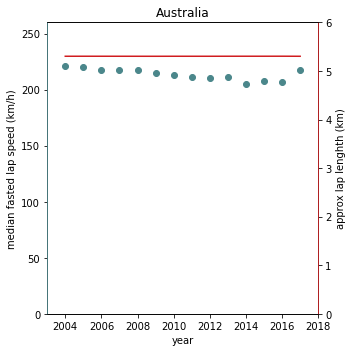

In [65]:
fig, ax = plt.subplots(figsize = (5, 5))

country = 'Australia'

df_temp = df_speed[df_speed['country'] == country]

ax.scatter(df_temp['year'], df_temp['medianFastestLapSpeed'], color = '#4B878BFF')
ax.set(xlabel = 'year'
       , ylabel = 'median fasted lap speed (km/h)'
       , title = country
       , ylim = (0, 260)
       , xlim = (2003, 2018))

ax2 = ax.twinx()
ax2.plot(df_temp['year'], df_temp['approxLapLength'] / 1000, color = '#D01C1FFF')
ax2.set(xlabel = 'year'
        , ylabel = 'approx lap lenghth (km)'
        , ylim = (0, 6)
        , xlim = (2003, 2018))

ax2.spines['left'].set_color('#4B878BFF')
ax2.spines['right'].set_color('#D01C1FFF')

plt.tight_layout()

Using a loop to display all GPs

In [66]:
countries = list(df_speed['country'].drop_duplicates())
len(countries)

25

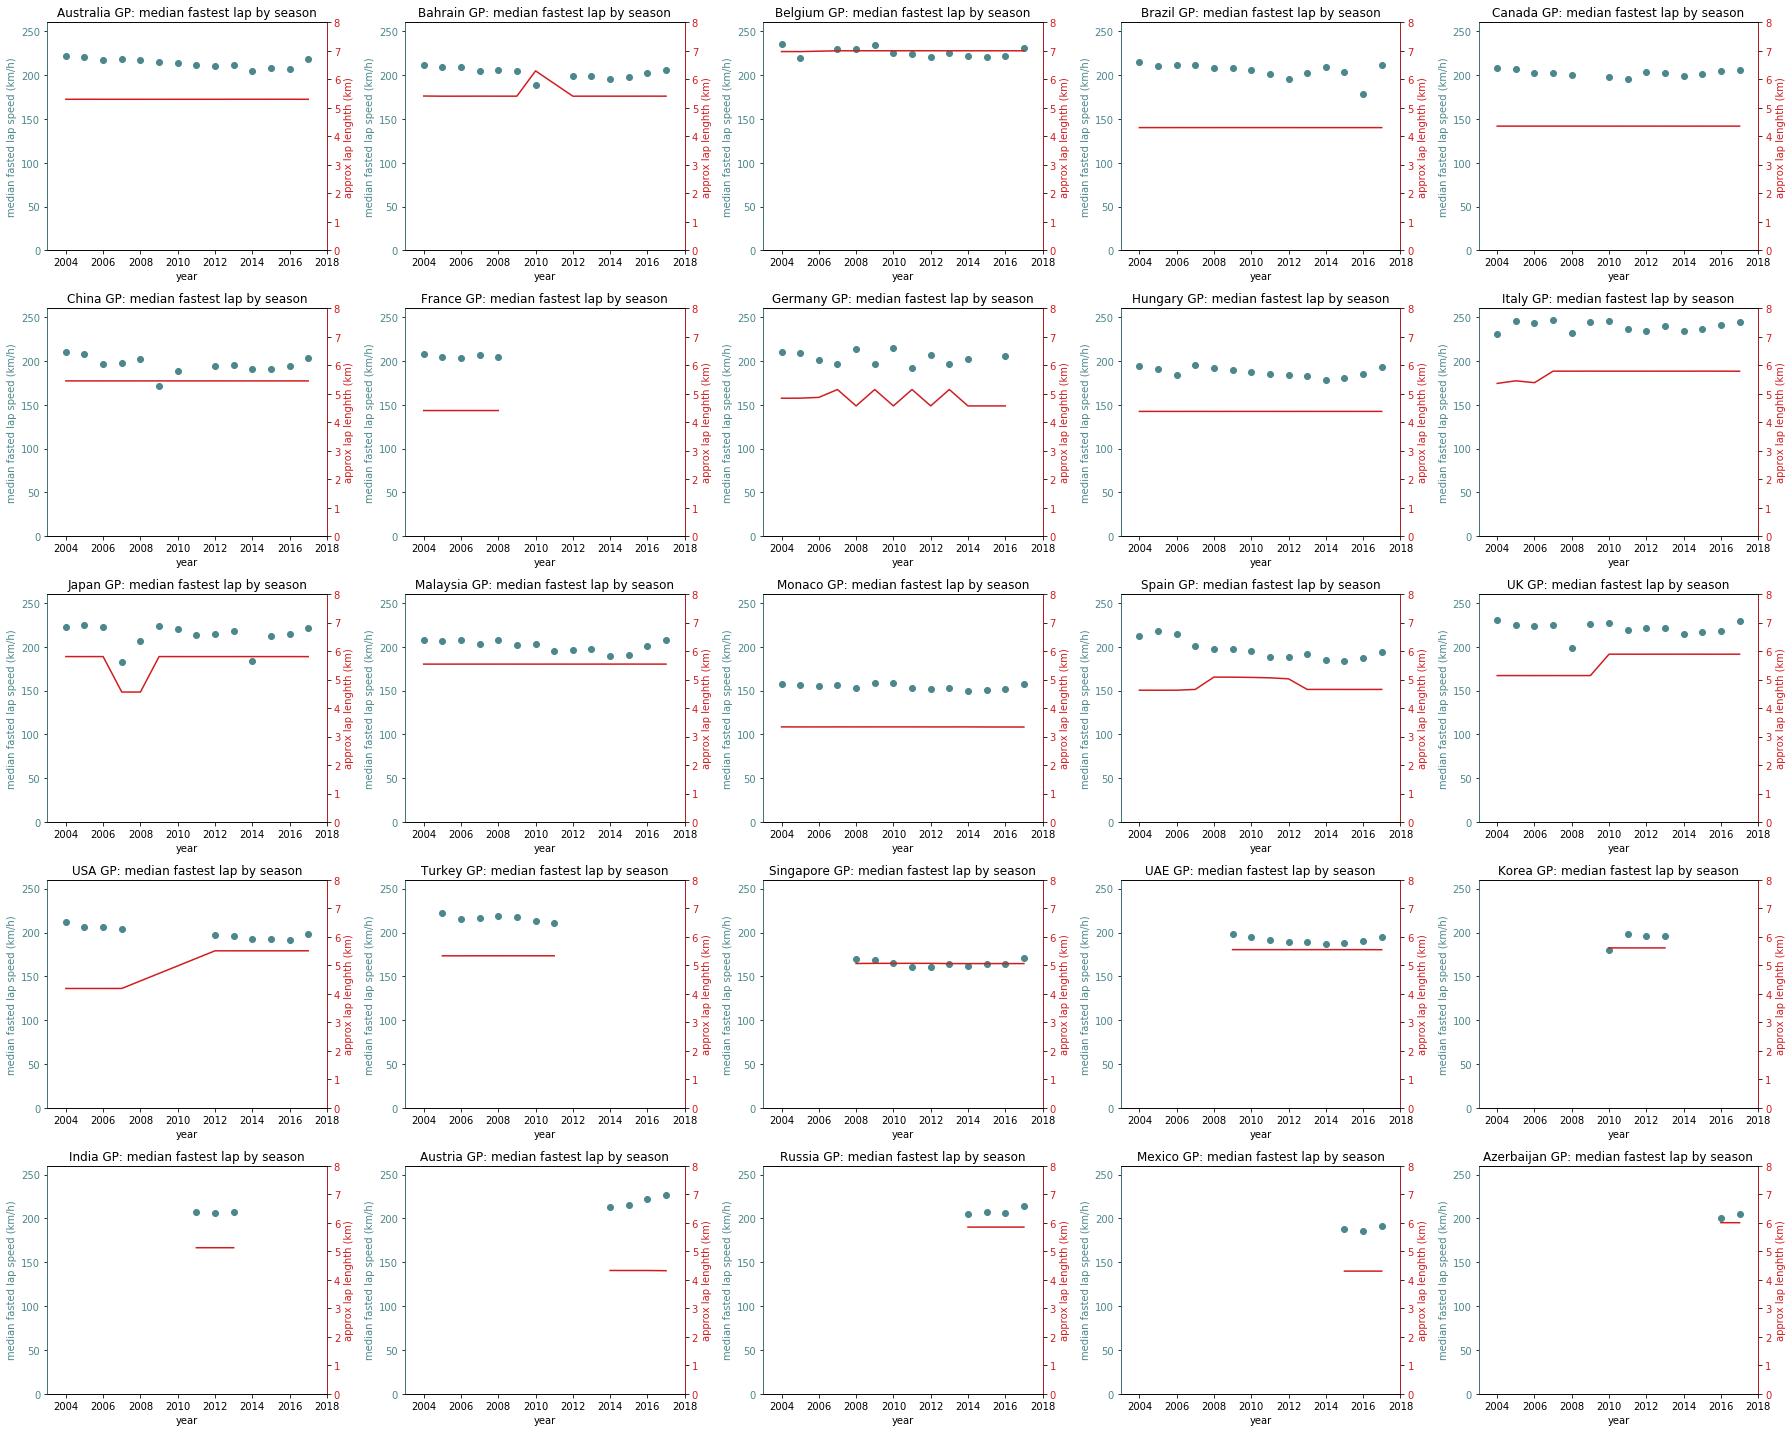

In [67]:
fig, ax = plt.subplots(nrows = 5, ncols = 5, figsize = (25, 20))

i = 0 
for r in range(0, 5):
    for c in range(0, 5):
        if i < len(countries):
            ax1 = ax[r, c]
            df_temp = df_speed[df_speed['country'] == countries[i]]
            # primary vertical axis
            ax1.scatter(df_temp['year'], df_temp['medianFastestLapSpeed'], color = '#4B878BFF')
            ax1.set(xlabel = 'year'
                    , ylabel = 'median fasted lap speed (km/h)'
                    , title = '{} GP: median fastest lap by season'.format(countries[i])
                    , ylim = (0, 260)
                    , xlim = (2003, 2018))
            # secondary vertical axis
            ax2 = ax1.twinx()
            ax2.plot(df_temp['year'], df_temp['approxLapLength'] / 1000, color = '#D01C1FFF')
            ax2.set(xlabel = 'year'
                    , ylabel = 'approx lap lenghth (km)'
                    , ylim = (0, 8)
                    , xlim = (2003, 2018))
            # colouring the axis
            ax2.spines['left'].set_color('#4B878BFF')
            ax2.spines['right'].set_color('#D01C1FFF')
            # colouring the ticks
            ax1.tick_params(axis='y', labelcolor = '#4B878BFF')
            ax2.tick_params(axis='y', labelcolor = '#D01C1FFF')
            # colouring the axis labels
            ax1.yaxis.label.set_color('#4B878BFF')
            ax2.yaxis.label.set_color('#D01C1FFF')
            # counter
            i = i + 1
        else:
            break
fig.tight_layout()
plt.show()

Let's list the GPs for which the track hasn't changed  and all races occured between 2004 and 2017

In [68]:
focus_countries = ['Australia', 'Brazil', 'Hungary', 'Malaysia', 'Monaco']
len(focus_countries)

5

### 7. Packaging things nicely for communication

Are F1 cars getting faster? Looking at the median fastest lap year after year, it seems that they've actually been getting gradually slower up until 2004 and have then gotten faster since

Source: "Formula 1 Race Data" by Chris G available on Kaggle (https://www.kaggle.com/cjgdev/formula-1-race-data-19502017, accessed 20/04/2020)
- 2004-2017 data
- displaying data for only 5 tracks (the 5 that haven't changed and have been used every year over the period)
- data from drivers who haven't finished the race is excluded

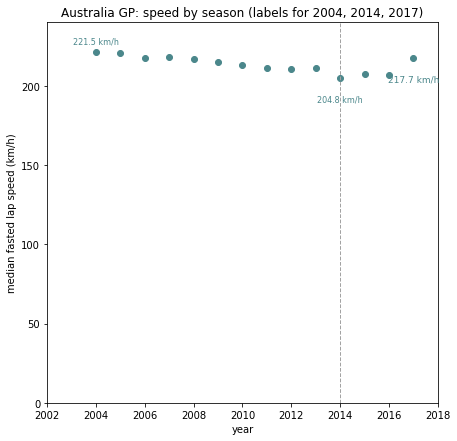

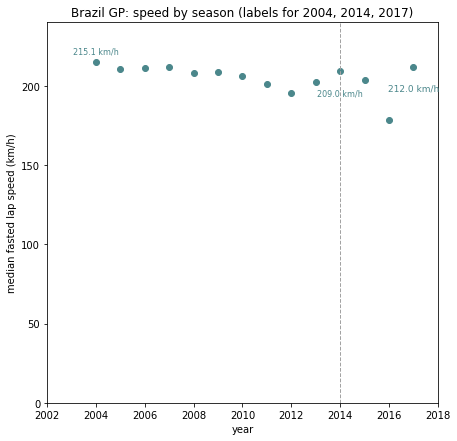

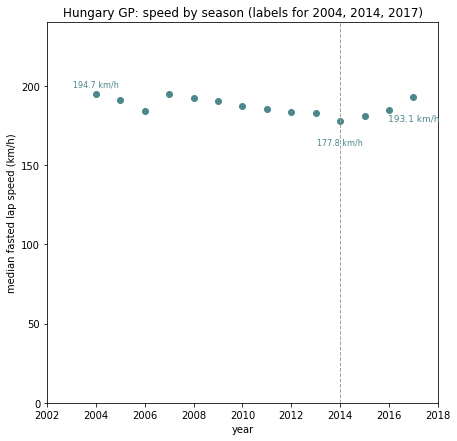

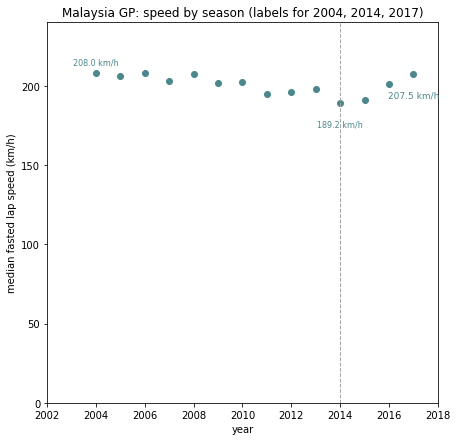

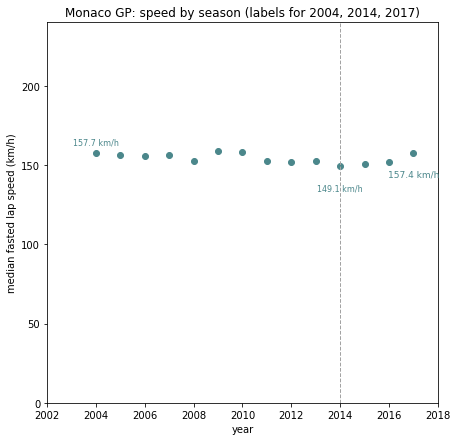

In [69]:
for country in focus_countries:
    fig, ax = plt.subplots(figsize = (7, 7))
    df_temp = df_speed[df_speed['country'] == country]
    # scatter plot
    ax.scatter(df_temp['year'], df_temp['medianFastestLapSpeed'], color = '#4B878BFF')
    ax.set(xlabel = 'year'
            , ylabel = 'median fasted lap speed (km/h)'
            , title = '{} GP: speed by season (labels for 2004, 2014, 2017)'.format(country)
            , ylim = (0, 240)
            , xlim = (2002, 2018))
    # adding vertical line for 2014
    ax.axvline(x = 2014, color = '#a3a3a3', linewidth = 1, linestyle = 'dashed')
    # adding labels for the 3 key years
    plt.text(x = 2004
             , y = df_temp.iloc[0, 2] + 5
             , s = '{} km/h'.format(round(df_temp.iloc[0, 2], 1))
             , size = 8
             , color = '#4B878BFF'
             , ha = 'center')
    plt.text(x = 2014
             , y = df_temp.iloc[10, 2] - 15
             , s = '{} km/h'.format(round(df_temp.iloc[10, 2], 1))
             , size = 8
             , color = '#4B878BFF'
             , ha = 'center')
    plt.text(x = 2017
             , y = df_temp.iloc[13, 2] - 15
             , s = '{} km/h'.format(round(df_temp.iloc[13, 2], 1))
             , size = 9
             , color = '#4B878BFF'
             , ha = 'center')
plt.show()

### 8. Plenty of other things we could have looked into

#### 8.1. Finland: population 5 million but so many drivers

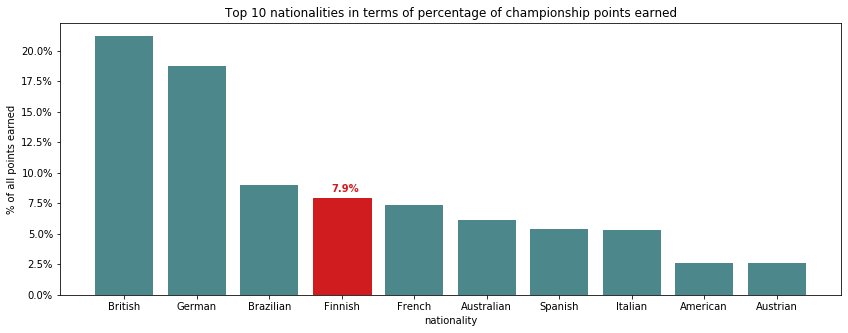

In [70]:
# data stuff
df_fin = df.groupby(['nationality'], as_index = False).agg({'points': 'sum'}).sort_values('points', ascending = False).copy()
df_fin['points_pct'] = df_fin['points'] / df_fin['points'].sum()
df_fin = df_fin.iloc[0:10]

# viz stuff
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize = (14, 5))
ax.bar(df_fin['nationality'], 100 * df_fin['points_pct'], color = '#4B878BFF')
ax.set(xlabel = 'nationality'
       , ylabel = '% of all points earned'
       , title = 'Top 10 nationalities in terms of percentage of championship points earned')
ax.get_children()[3].set_color('#D01C1FFF') 
plt.text(x = 3 - 0.15
         , y = 100 * df_fin['points_pct'].iloc[3] + 0.5
         , s = '{}%'.format(round(100 * df_fin['points_pct'].iloc[3], 2))
         , size = 10
         , color = '#D01C1FFF'
         , weight = 'bold')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

#### 8.2.  How much does the grid position matters?

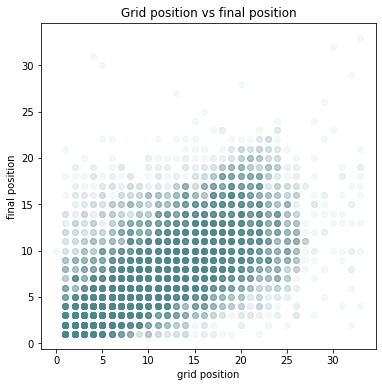

In [71]:
# data stuff
df_rel = df[['grid', 'position']].copy()
df_rel = df_rel.dropna()

# viz stuff
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(df_rel['grid'], df_rel['position'], alpha = 0.05, color = '#4B878BFF')
ax.set(xlabel = 'grid position'
       , ylabel = 'final position'
       , title = 'Grid position vs final position')
plt.show()

#### 8.3.  Constructor history

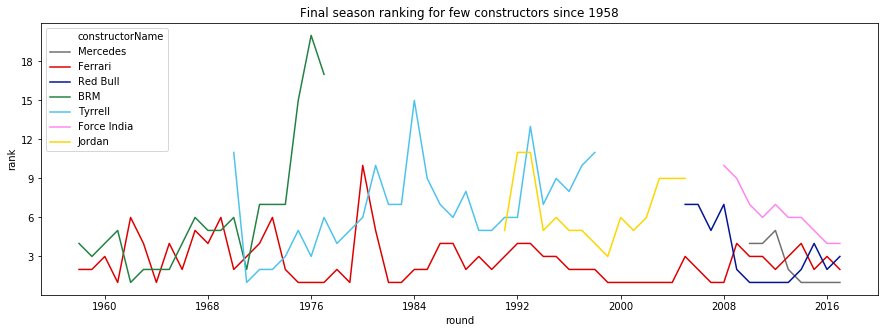

In [72]:
# data stuff
df_cns = data_dict['constructorStandings'][['raceId', 'constructorId', 'points', 'position']].copy()
df_cns = df_cns.merge(data_dict['constructors'], how = 'left')
df_cns = df_cns.merge(data_dict['races'][['raceId', 'year', 'raceName', 'round']], how = 'left')
df_cns = df_cns[['constructorName', 'position', 'year', 'round']]
df_fnl = df_cns.groupby(['year'], as_index = False).agg({'round': np.max})
df_fnl.rename(columns = {'round': 'finalRound'}, inplace = True)
df_cns = df_cns.merge(df_fnl, how = 'left')
df_cns = df_cns[df_cns['round'] == df_cns['finalRound']]
df_cns = df_cns[['constructorName', 'position', 'year']]
focus_constructors = ['Mercedes', 'Ferrari', 'Red Bull', 'BRM', 'Tyrrell', 'Force India', 'Jordan']
focus_palette = {'Mercedes': '#707070'
                 , 'Ferrari': '#de0000'
                 , 'Red Bull': '#001496'
                 , 'BRM': '#228243'
                 , 'Tyrrell': '#4dc3eb'
                 , 'Force India': '#ff85ef'
                 , 'Jordan': '#fcd700'}
df_cns = df_cns[df_cns['constructorName'].isin(focus_constructors)]

# viz stuff
fig, ax = plt.subplots(figsize = (15, 5))
ax = sns.lineplot(data = df_cns
                  , x = 'year'
                  , y = 'position'
                  , hue = 'constructorName'
                  , palette = focus_palette
                  , hue_order = focus_constructors)
ax.set(xlabel = 'round'
       , ylabel = 'rank'
       , title = 'Final season ranking for few constructors since 1958')
ax.legend(loc = 'upper left')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer = True))
ax.yaxis.set_major_locator(MaxNLocator(integer = True))
plt.show()